<a href="https://colab.research.google.com/github/atakanerdogn/Health-Data-Projects/blob/main/bacteria%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bac = pd.read_csv('/content/bacteria_list_200 (1).csv')
bac.head()

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes


In [3]:
bac['Name'].value_counts()

,count
Name,
Coxiella burnetii,2
Fusobacterium nucleatum,2
Francisella tularensis,2
Gardnerella vaginalis,2
Ureaplasma urealyticum,2
...,...
Rathayibacter toxicus,1
Simonsiella muelleri,1
Tepidimonas arfidensis,1


In [4]:
bac['Family'].value_counts()

,count
Family,
Enterobacteriaceae,21
Bacillaceae,7
Streptococcaceae,6
Flavobacteriaceae,6
Bifidobacteriaceae,5
...,...
Aerococcaceae,1
Planococcaceae,1
Planctomycetaceae,1


In [5]:
bac['Where Found'].value_counts()

,count
Where Found,
Soil,17
Intestinal tract,12
"Soil, water",12
Marine environments,6
Plants,5
...,...
Animal intestines,1
Infected fish,1
Infected grasses,1


In [6]:
bac['Harmful to Humans'].value_counts()

,count
Harmful to Humans,
No,102
Yes,96
Yes,1


In [7]:
# name and family

nf = bac[['Name','Family']]
nf.head()

,Name,Family
0,Escherichia coli,Enterobacteriaceae
1,Staphylococcus aureus,Staphylococcaceae
2,Lactobacillus acidophilus,Lactobacillaceae
3,Bacillus subtilis,Bacillaceae
4,Clostridium botulinum,Clostridiaceae


In [8]:
bac.isnull().sum()

,0
Name,0
Family,0
Where Found,0
Harmful to Humans,0


In [9]:
bac.duplicated().sum()

np.int64(3)

In [10]:
bac.drop_duplicates(inplace=True)

In [11]:
bac.duplicated().sum()

np.int64(0)

In [12]:
bac['Harmful to Humans'].value_counts().unique()

array([102,  93,   1])

In [13]:
bac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               196 non-null    object
 1   Family             196 non-null    object
 2   Where Found        196 non-null    object
 3   Harmful to Humans  196 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


In [14]:
bac_stats = bac.describe()
bac_stats_DF = pd.DataFrame(bac_stats)
bac_stats_DF.style.background_gradient(cmap='Greens')

,Name,Family,Where Found,Harmful to Humans
count,196,196,196,196
unique,194,93,120,3
top,Fusobacterium nucleatum,Enterobacteriaceae,Soil,No
freq,2,21,17,102


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bac['Name'] = le.fit_transform(bac['Name'])
bac['Family'] = le.fit_transform(bac['Family'])
bac['Where Found'] = le.fit_transform(bac['Where Found'])


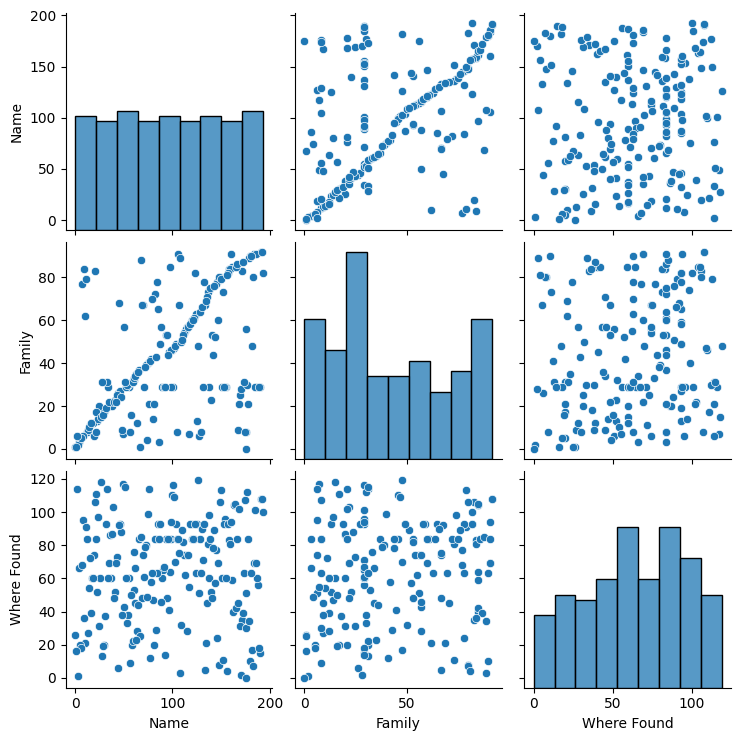

In [16]:
sns.pairplot(bac)

In [17]:
bac['Harmful to Humans'] = bac['Harmful to Humans'].str.strip()
bac['Harmful to Humans'] = bac['Harmful to Humans'].replace({'yes ': 'yes', ' yes': 'yes'})

<Axes: xlabel='Harmful to Humans', ylabel='count'>

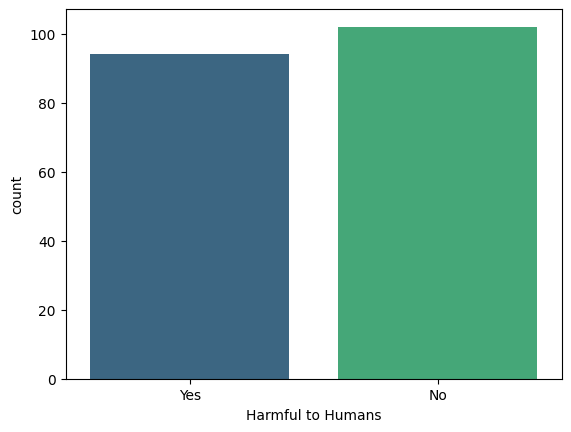

In [18]:
sns.countplot(x='Harmful to Humans', data=bac, palette='viridis')

In [19]:
bac_n = bac.select_dtypes(exclude='object')
bac_n.head()

bac_n.corr().style.background_gradient(cmap='Greens')

,Name,Family,Where Found
Name,1.000000,0.508616,0.047833
Family,0.508616,1.000000,0.124018
Where Found,0.047833,0.124018,1.000000


In [28]:
# where found vs harmful to humans

wh = bac.groupby('Where Found')['Harmful to Humans'].value_counts()
wh_num = np.array(wh)
wh_num

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  3,
        1,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,  1,  6,  6,  1,  1,  5,
        1,  1,  1,  2,  1,  1,  4,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,
        1,  1,  2,  1,  1, 12,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,
        2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1])

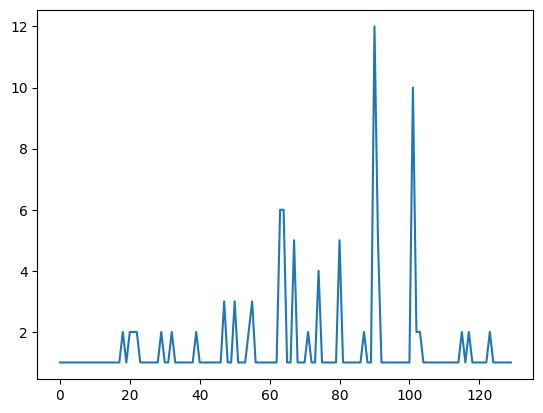

In [29]:
plt.plot(wh_num)

<Axes: ylabel='count'>

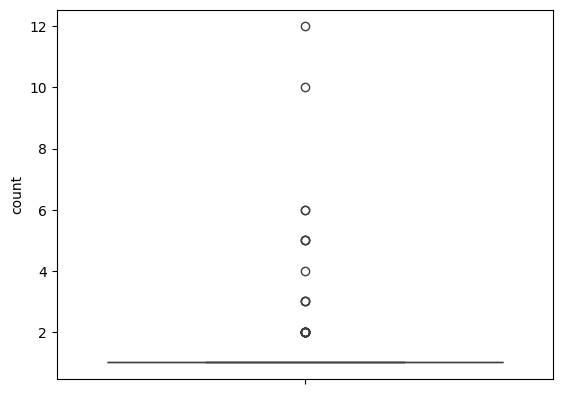

In [30]:
sns.boxplot(wh)